In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-original/mnist-original.mat


In [2]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [3]:
mnist = loadmat("/kaggle/input/mnist-original/mnist-original.mat")
mnistx =  mnist["data"].T
mnisty = mnist["label"].T

In [4]:
print(mnistx.shape)
print(mnisty.shape)

(70000, 784)
(70000, 1)


In [5]:
xmoons, ymoons = make_moons(n_samples = 100, noise = 0.1)
print(xmoons.shape)

ymoons = ymoons.reshape(-1, 1)
print(ymoons.shape)

(100, 2)
(100, 1)


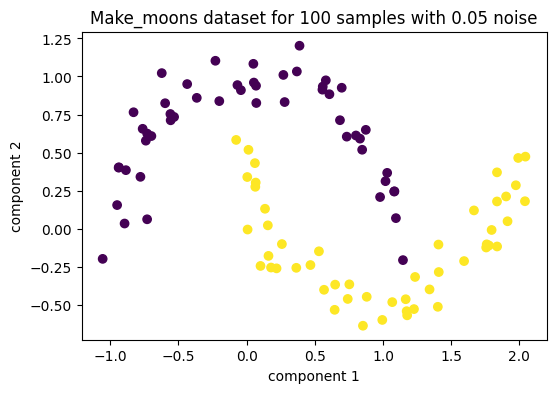

In [6]:
plt.figure(figsize = (6,4))
plt.scatter(xmoons[:, 0], xmoons[:, 1], c = ymoons)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Make_moons dataset for 100 samples with 0.05 noise")
plt.show()

In [7]:
pca = PCA(n_components=2)
xmoonspca = pca.fit_transform(xmoons)
print(xmoonspca.shape)

(100, 2)


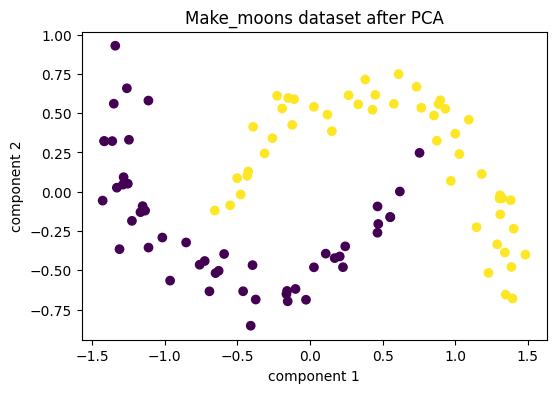

In [8]:
plt.figure(figsize = (6,4))
plt.scatter(xmoonspca[:, 0], xmoonspca[:, 1], c = ymoons)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Make_moons dataset after PCA")
plt.show()

In [9]:
xdigitpca = pca.fit_transform(mnistx)
print(xdigitpca.shape)

(70000, 2)


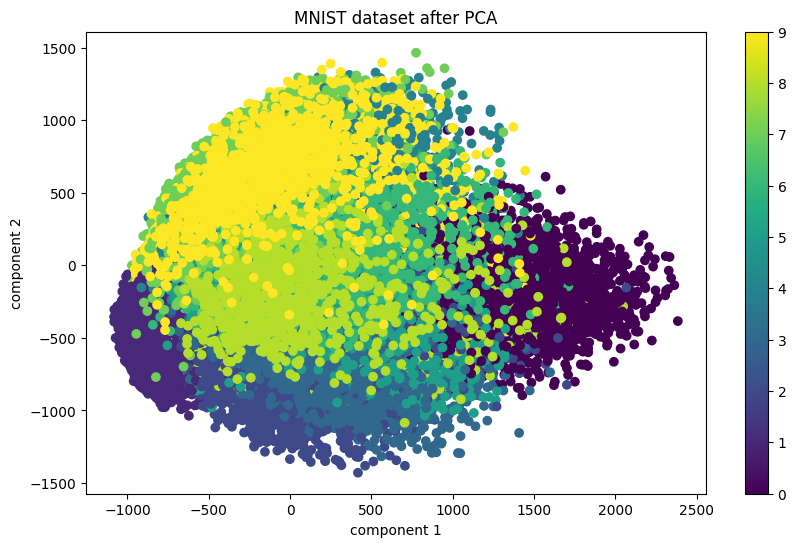

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(xdigitpca[:, 0], xdigitpca[:, 1], c = mnisty)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.title("MNIST dataset after PCA")
plt.show()

Evaluating different other PCA, starting with RandomizedPCA.

In [11]:
randompca = PCA(svd_solver = "randomized", n_components=154)
randompcax = randompca.fit_transform(mnistx)
print(randompcax.shape)

(70000, 154)


In [12]:
increpca = IncrementalPCA(n_components= 154)
for partialx in np.array_split(mnistx, 7):
    increpca.partial_fit(partialx)
xreduced = increpca.transform(mnistx)
print(xreduced.shape)

(70000, 154)


# Kernel PCA for moons dataset

**As can be seen, PCA doesnt yield very good results. The output is quite similar to the input itself making one wonder if we have applied dimensionality reduction or not.**

In [13]:
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(xmoons, ymoons.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [14]:
grid_search.best_estimator_

Pipeline(steps=[('kpca',
                 KernelPCA(gamma=0.03222222222222222, kernel='rbf',
                           n_components=2)),
                ('log_reg', LogisticRegression())])

In [15]:
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2, gamma=0.04, kernel='rbf')),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])
clf.fit(xmoons, ymoons.ravel())

Pipeline(steps=[('kpca', KernelPCA(gamma=0.04, kernel='rbf', n_components=2)),
                ('log_reg', LogisticRegression())])

In [16]:
kpca1 = KernelPCA(kernel = "rbf", gamma = 30, n_components = 2)
reduced_xmoons = kpca1.fit_transform(xmoons)

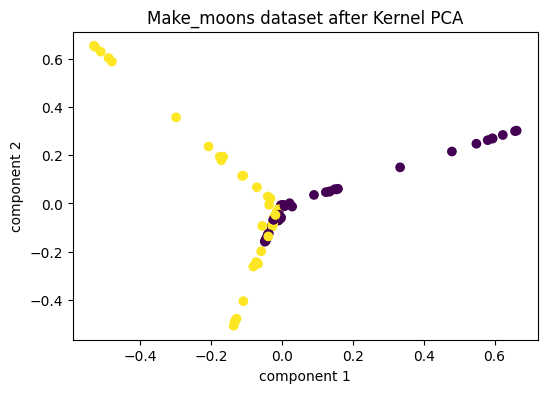

In [17]:
plt.figure(figsize = (6,4))
plt.scatter(reduced_xmoons[:, 0], reduced_xmoons[:, 1], c = ymoons)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Make_moons dataset after Kernel PCA")
plt.show()

In [18]:
from sklearn.datasets import make_swiss_roll

swissrollx, swissrolly = make_swiss_roll(n_samples=2000, noise = 0.1)
swissrolly = swissrolly.reshape(-1,1)

In [19]:
print(swissrollx.shape)
print(swissrolly.shape)

(2000, 3)
(2000, 1)


Text(0.5, 0.92, 'Swiss Roll dataset')

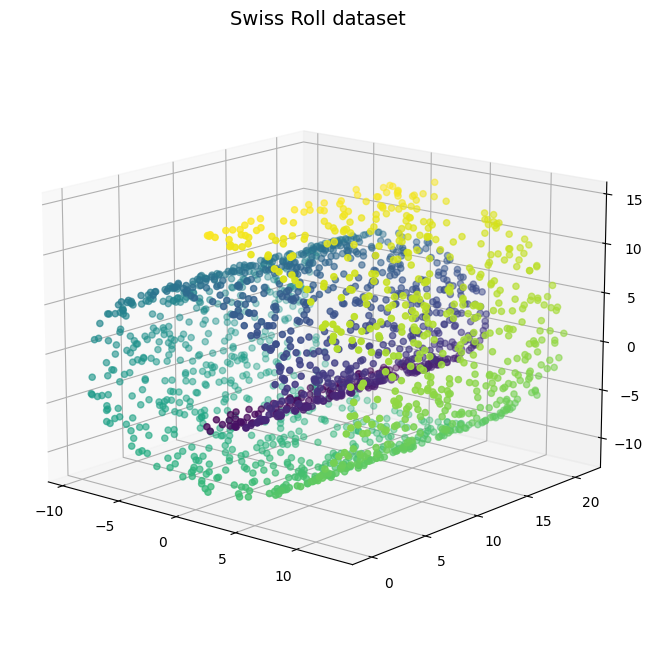

In [20]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(swissrollx[:, 0],swissrollx[:, 1],swissrollx[:, 2], c = swissrolly)
ax.view_init(elev = 15, azim = -50)
ax.set_title("Swiss Roll dataset",fontsize=14)

In [21]:
pca = PCA(n_components=2)
swissrollx_red = pca.fit_transform(swissrollx)
print(swissrollx_red.shape)

(2000, 2)


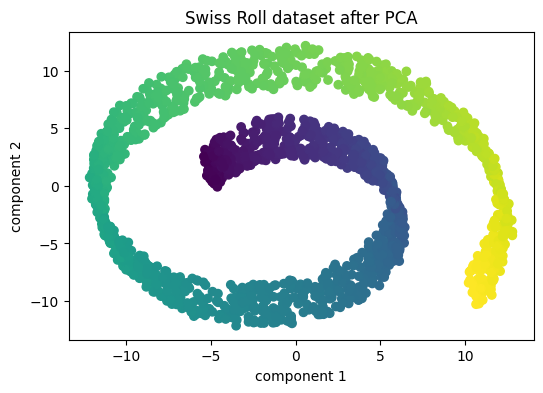

In [22]:
plt.figure(figsize = (6,4))
plt.scatter(swissrollx_red[:, 0], swissrollx_red[:, 1], c = swissrolly)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Swiss Roll dataset after PCA")
plt.show()

In [23]:
pca_rbf = KernelPCA(n_components=2, gamma = 0.05, kernel = "rbf")
swiss_x_rbf = pca_rbf.fit_transform(swissrollx)

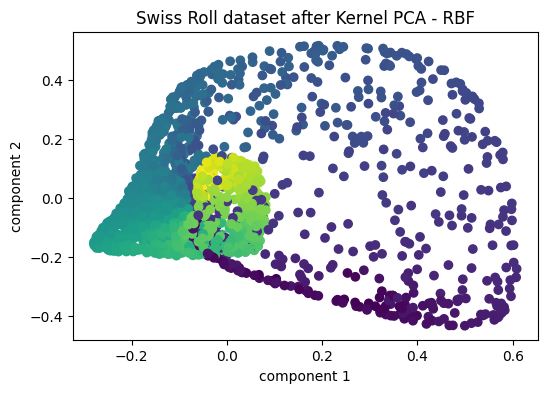

In [24]:
plt.figure(figsize = (6,4))
plt.scatter(swiss_x_rbf[:, 0], swiss_x_rbf[:, 1], c = swissrolly)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Swiss Roll dataset after Kernel PCA - RBF")
plt.show()

In [25]:
from sklearn.manifold import LocallyLinearEmbedding 

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
swiss_x_lle = lle.fit_transform(swissrollx)

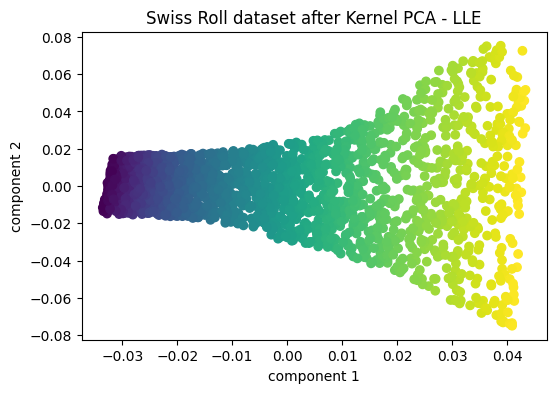

In [26]:
plt.figure(figsize = (6,4))
plt.scatter(swiss_x_lle[:, 0], swiss_x_lle[:, 1], c = swissrolly)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Swiss Roll dataset after Kernel PCA - LLE")
plt.show()